In [1]:
import scanpy as sc

In [4]:
adata = sc.read_h5ad(r"C:\Users\visiu\Documents\pyqt5_proj\P4_visual.hdf5")
adata

AnnData object with n_obs × n_vars = 169136 × 315
    obs: 'region', 'slide', 'cell_id', 'area', 'leiden', 'leiden_res_0.05', 'leiden_res_0.10', 'leiden_res_0.50', 'leiden_res_1.00', 'leiden_res_1.50', 'leiden_res_2.00', 'cell_type_1', 'cell_type_2'
    uns: 'cell_type_1_colors', 'cell_type_2_colors', 'leiden', 'leiden_colors', 'leiden_res_0.05', 'leiden_res_0.05_colors', 'leiden_res_0.10', 'leiden_res_0.10_colors', 'leiden_res_0.50', 'leiden_res_0.50_colors', 'leiden_res_1.00', 'leiden_res_1.00_colors', 'leiden_res_1.50', 'leiden_res_1.50_colors', 'leiden_res_2.00', 'leiden_res_2.00_colors', 'neighbors', 'pca', 'sopa_attrs', 'spatial_neighbors', 'spatialdata_attrs', 'umap'
    obsm: 'X_pca', 'X_umap', 'intensities', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

In [5]:
adata.obs['leiden'].unique()

['17', '18', '6', '1', '15', ..., '24', '28', '31', '25', '0']
Length: 32
Categories (32, object): ['0', '1', '2', '3', ..., '28', '29', '30', '31']

c:\Users\visiu\Documents\pyqt5_proj\Lib\site-packages\squidpy\pl\_spatial_utils.py:981: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


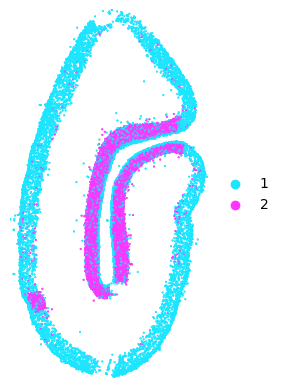

In [12]:
import numpy as np
import squidpy as sq
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D

fig, ax = plt.subplots()

x_coords = adata.obsm['spatial'][:, 0]
y_coords = adata.obsm['spatial'][:, 1]

center_x = (x_coords.max() + x_coords.min()) / 2
center_y = (y_coords.max() + y_coords.min()) / 2

rotation = Affine2D().rotate_around(center_x, center_y, np.pi / 2)
ax.transData = rotation + ax.transData

sq.pl.spatial_scatter(adata, shape=None, color='leiden', groups=('1', '2'), ax=ax, legend_loc='right margin', frameon=False, title=None)

ax.set_title('')

coords = rotation.transform(np.vstack([x_coords, y_coords]).T)
x_min, y_min = coords.min(axis=0)
x_max, y_max = coords.max(axis=0)

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

plt.show()

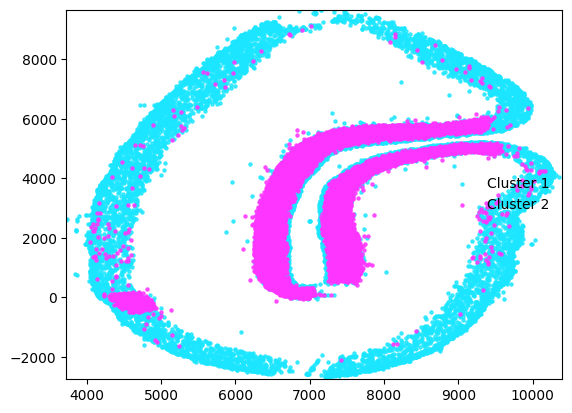

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
from matplotlib import cm
# 플롯 생성
fig, ax = plt.subplots()

# 데이터 준비
x_coords = adata.obsm['spatial'][:, 0]
y_coords = adata.obsm['spatial'][:, 1]

leiden_clusters = adata.obs['leiden'].astype(str)
leiden_categories = adata.obs['leiden'].cat.categories

# 색상 지정
leiden_colors = adata.uns['leiden_colors']
color_dict = {cat: color for cat, color in zip(leiden_categories, leiden_colors)}

# 회전 설정
center_x = (x_coords.max() + x_coords.min()) / 2
center_y = (y_coords.max() + y_coords.min()) / 2

rotation = Affine2D().rotate_around(center_x, center_y, np.pi / 2)
ax.transData = rotation + ax.transData

# 각 클러스터별로 플롯
for cluster in ['1', '2']:  # 원하는 클러스터들만 플로팅
    indices = leiden_clusters == cluster
    ax.scatter(x_coords[indices], y_coords[indices], s=5, c=color_dict[cluster], label=f'Cluster {cluster}', alpha=0.8)

# 좌표계의 범위를 자동으로 설정
coords = rotation.transform(np.vstack([x_coords, y_coords]).T)
x_min, y_min = coords.min(axis=0)
x_max, y_max = coords.max(axis=0)
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

# 범례 설정
ax.legend(loc='right', frameon=False)

# 타이틀 제거
ax.set_title('')

# 플롯 표시
plt.show()


In [20]:
import plotly.express as px
import numpy as np

# 좌표 데이터 가져오기
x_coords = adata.obsm['spatial'][:, 0]
y_coords = adata.obsm['spatial'][:, 1]

# 중심 좌표 계산
center_x = (x_coords.max() + x_coords.min()) / 2
center_y = (y_coords.max() + y_coords.min()) / 2

# 회전 행렬을 적용하여 좌표 회전
rotation_matrix = np.array([
    [np.cos(np.pi / 2), -np.sin(np.pi / 2)],
    [np.sin(np.pi / 2), np.cos(np.pi / 2)]
])
rotated_coords = np.dot(np.vstack([x_coords - center_x, y_coords - center_y]).T, rotation_matrix)
rotated_x_coords = rotated_coords[:, 0] + center_x
rotated_y_coords = rotated_coords[:, 1] + center_y

# Plotly를 사용하여 플롯 생성
fig = px.scatter(x=rotated_x_coords,
                 y=rotated_y_coords,
                 color=adata.obs['leiden'],
                 labels={'x': 'Rotated X', 'y': 'Rotated Y'},
                 title='Rotated Spatial Plot')

fig.update_traces(marker=dict(size=2))

fig.update_layout(
    xaxis=dict(
        scaleanchor="y",  
        scaleratio=1      
    ),
    yaxis=dict(
        scaleanchor="x",  
        scaleratio=1      
    ),
    plot_bgcolor="white",  
    paper_bgcolor="white"  
)

# 그래프 표시
fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed